# Bibliotecas

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from pylab import text

In [2]:
data_folder = r"C:\Users\anaso\Desktop\workspace\doutorado\data"
saving_path = r"C:\Users\anaso\Desktop\workspace\doutorado\imagens"

# Gráficos

### Resultados online do modelo NB136

In [19]:
data_teste = pd.read_csv(data_folder + "\\test_data.csv", sep=';')
data_teste.rename(columns={'Time':'time'}, inplace=True)
data_teste['time'] = pd.to_datetime(data_teste['time'])
data_teste.head()

,time,PDIT-301,PIT-302,PIT-303,PIT-304,PIT-305,PIT-306,VT-301,VT-302,VT-303,...,TI-306,TI-307,TI-308,TI-309,TI-310,Corrente,Potencia,FIT-323,rotulos_multi,rotulos_bin
0,2015-05-05 20:34:00,17.0,783.650024,149.949997,149.600006,281.399994,15015.000000,1363.699951,1286.099976,2114.000000,...,2615.100098,4246.100098,4052.399902,2616.000000,2774.000000,113.900002,2.784667,3934.600098,0.0,0
1,2015-05-05 20:35:00,17.0,783.700012,150.449997,148.750000,267.950012,17595.650391,1640.000000,1474.900024,2377.949951,...,2621.100098,4858.700195,4648.000000,2874.399902,3229.000000,139.100006,2.980000,4338.799805,0.0,0
2,2015-05-05 20:40:00,17.0,270.700012,155.050003,154.399994,235.949997,16107.349609,1639.949951,1433.400024,2499.300049,...,2734.000000,4381.549805,4116.700195,3417.000000,3218.149902,96.900002,1.520000,2128.000000,0.0,0
3,2015-05-05 20:41:00,17.0,778.650024,143.649994,143.300003,237.300003,17771.949219,1704.050049,1538.400024,2431.149902,...,2749.750000,5028.700195,4802.000000,3503.699951,3458.850098,136.100006,2.971000,4344.799805,0.0,0
4,2015-05-05 20:42:00,17.0,778.000000,143.000000,142.000000,194.100006,17540.550781,1655.949951,1503.949951,2395.850098,...,2766.449951,5285.600098,5077.000000,3688.149902,3845.699951,140.000000,2.960000,4307.200195,0.0,0


In [20]:
results_online_nb136_17_18 = pd.read_csv(data_folder + "\\results_online_nb136_17_18.csv", sep=';')
results_online_nb136_17_18 = results_online_nb136_17_18.dropna().drop(['Unnamed: 0'], axis=1)
results_online_nb136_17_18['time'] = pd.to_datetime(results_online_nb136_17_18['time'])

results_online_nb136_20_24 = pd.read_csv(data_folder + "\\results_online_nb136_20_24.csv", sep=';')
results_online_nb136_20_24 = results_online_nb136_20_24.dropna().drop(['Unnamed: 0'], axis=1)
results_online_nb136_20_24['time'] = pd.to_datetime(results_online_nb136_20_24['time'])

C:\Users\anaso\AppData\Local\Continuum\anaconda3\envs\doc-ana\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
results_online_nb136_17_18.head()

,time,real,prediction
24,2015-05-05 21:02:00,0.0,1.0
25,2015-05-05 21:03:00,0.0,1.0
26,2015-05-05 21:04:00,0.0,1.0
27,2015-05-05 21:05:00,0.0,1.0
28,2015-05-05 21:06:00,0.0,1.0


In [22]:
results_online_nb136_20_24.head()

,time,real,prediction
24,2015-09-24 04:49:00,0.0,0.0
25,2015-09-24 04:50:00,0.0,0.0
26,2015-09-24 04:51:00,0.0,0.0
27,2015-09-24 04:52:00,0.0,0.0
28,2015-09-24 04:53:00,0.0,0.0


### Falha 17

In [157]:
fault = 17

In [158]:
print(results_online_nb136_17_18[results_online_nb136_17_18['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2015-05-23 14:58:00
2015-05-23 14:58:00


In [159]:
fault_predict = results_online_nb136_17_18[results_online_nb136_17_18['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(24984, 3)
(24984, 28)


In [160]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(24984, 30)

In [161]:
final_dataset.isnull().sum().sum()

0

In [162]:
final_dataset_filter = final_dataset[19000:].copy()
final_dataset_filter['prediction'].iloc[:2070] = 0.0

C:\Users\anaso\AppData\Local\Continuum\anaconda3\envs\doc-ana\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [163]:
final_dataset_filter['prediction'] = final_dataset_filter['prediction'].astype('int')

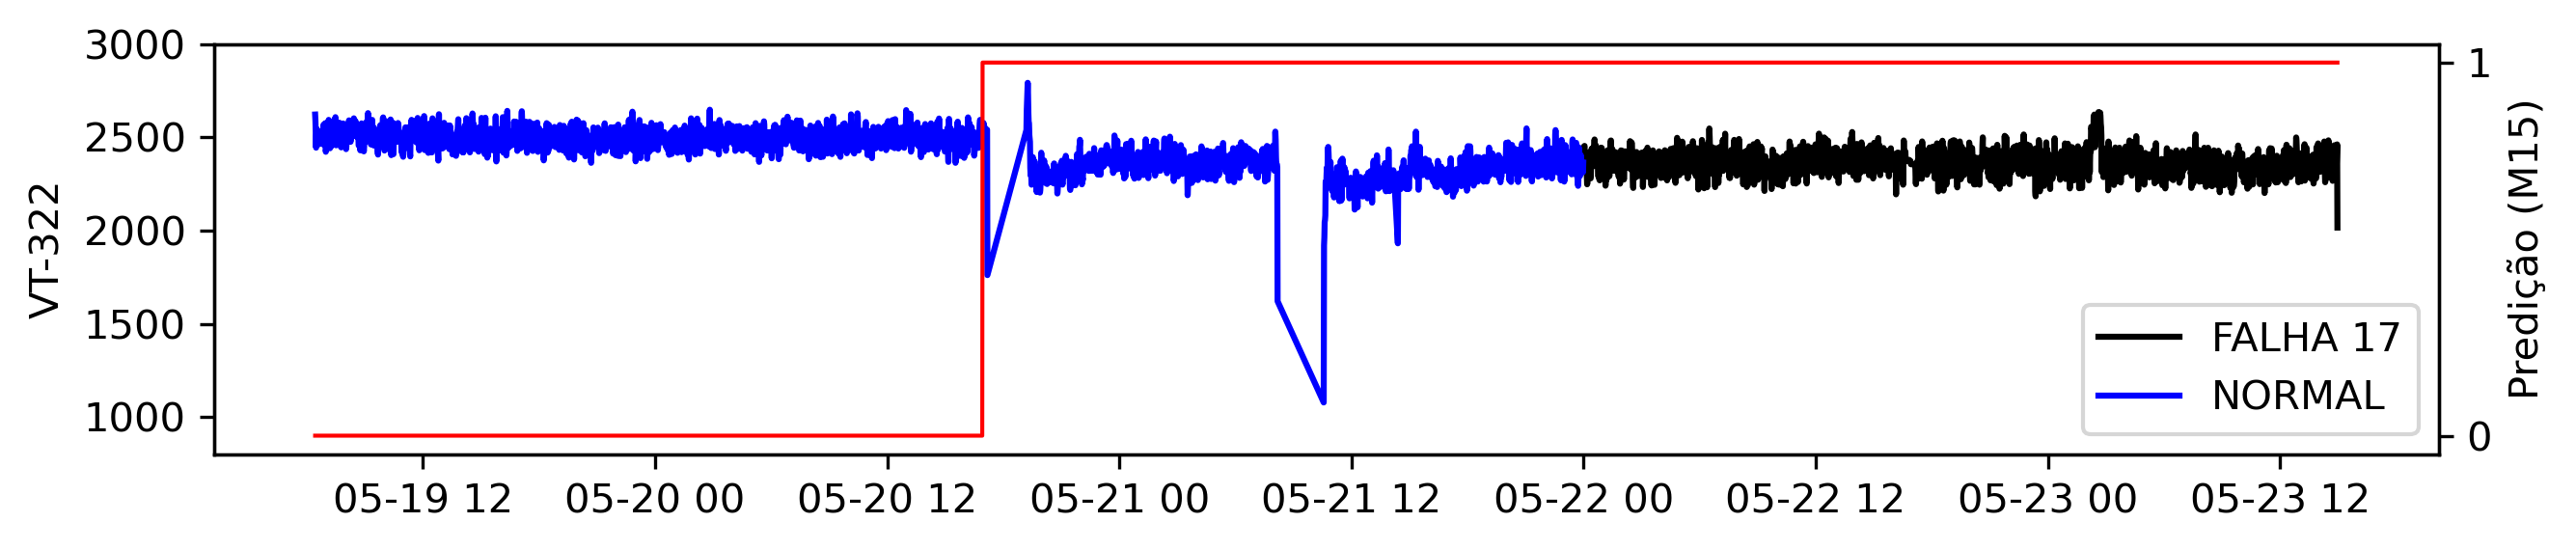

In [168]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FALHA 17')
plot2 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')
plot3 = ax2.plot(final_dataset_filter['time'], final_dataset_filter['prediction'], color='red', label='PREDIÇÃO (M15)', linewidth=1)

# ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VT-322')
ax2.set_ylabel('Predição (M15)') #color='red'
ax1.set_ylim([800, 3000])
ax2.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(loc='lower right')
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()
fig.savefig(saving_path + '/nb136_online_falha17.png', format='png', bbox_inches='tight');

### Falha 18

In [186]:
fault = 18

In [187]:
print(results_online_nb136_17_18[results_online_nb136_17_18['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2015-06-10 08:44:00
2015-06-10 08:44:00


In [188]:
fault_predict = results_online_nb136_17_18[results_online_nb136_17_18['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(47472, 3)
(47472, 28)


In [189]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(47472, 30)

In [190]:
final_dataset.isnull().sum().sum()

0

In [191]:
final_dataset_filter = final_dataset[30000:-1000].copy()
# final_dataset_filter['prediction'].iloc[:2070] = 0.0

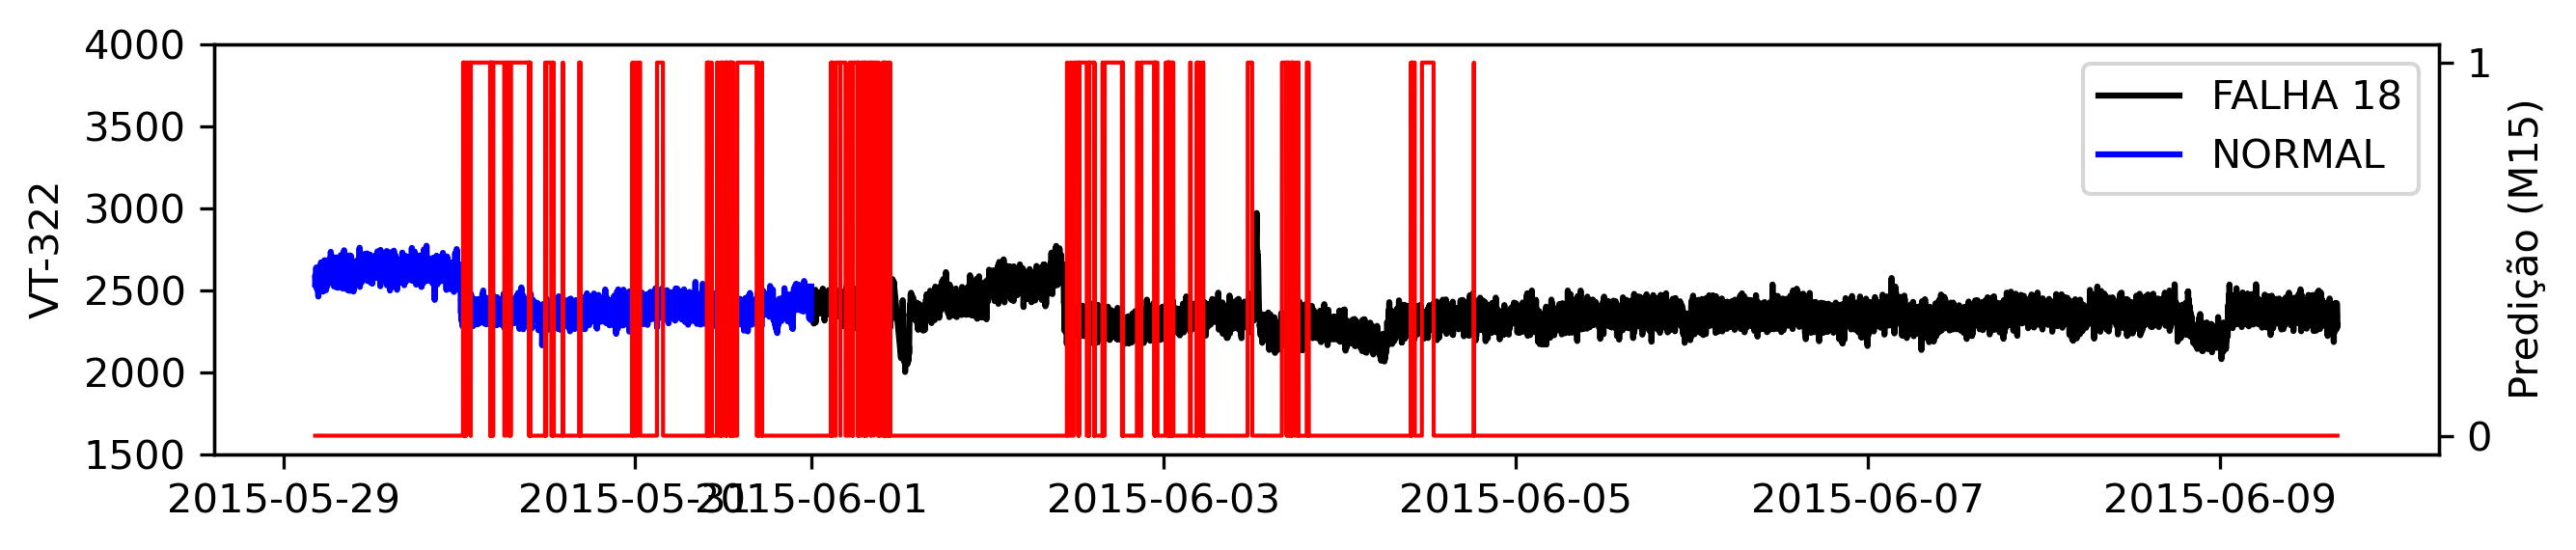

In [195]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FALHA 18')
plot2 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')
plot3 = ax2.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)

# ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VT-322')
ax2.set_ylabel('Predição (M15)') #color='red'
ax1.set_ylim([1500, 4000])
ax2.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(loc='upper right')
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()
fig.savefig(saving_path + '/nb136_online_falha18.png', format='png', bbox_inches='tight');

### Falha 20

In [196]:
fault = 20

In [197]:
print(results_online_nb136_20_24[results_online_nb136_20_24['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2016-10-11 23:59:00
2016-10-11 23:59:00


In [198]:
fault_predict = results_online_nb136_20_24[results_online_nb136_20_24['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(21569, 3)
(121569, 28)


In [199]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(21569, 30)

In [200]:
final_dataset.isnull().sum().sum()

0

In [201]:
final_dataset_filter = final_dataset#[30000:].copy()
# final_dataset_filter['prediction'].iloc[:2070] = 0.0

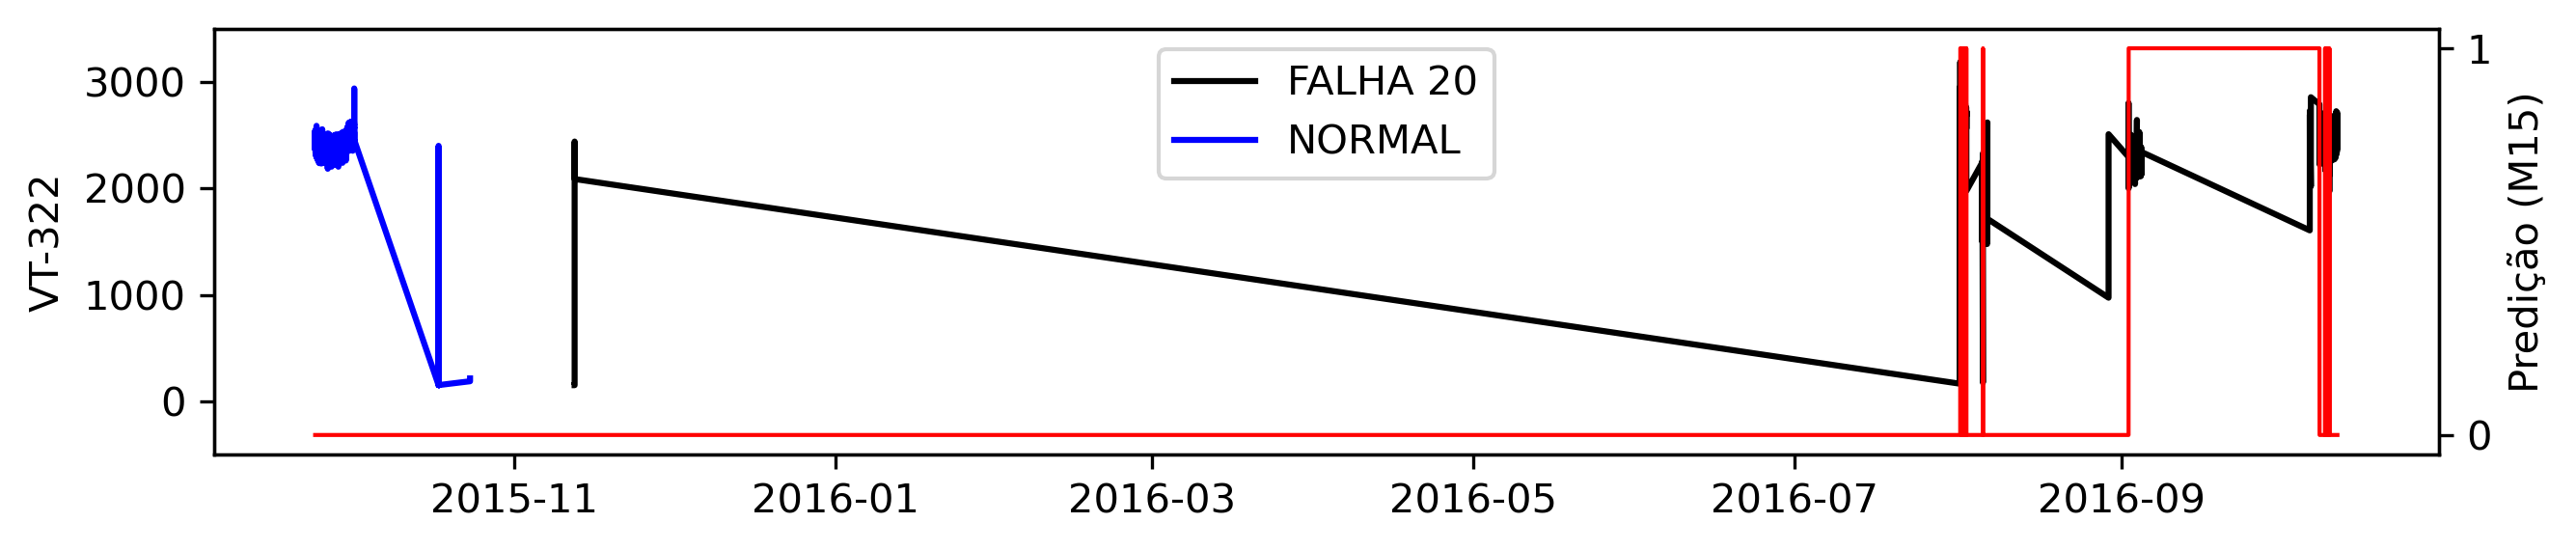

In [205]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FALHA 20')
plot2 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')
plot3 = ax2.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)

# 
# ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VT-322')
ax2.set_ylabel('Predição (M15)') #color='red'
ax1.set_ylim([-500, 3500])
ax2.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(loc='upper center')
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()

### Falha 24

In [206]:
fault = 24

In [207]:
print(results_online_nb136_20_24[results_online_nb136_20_24['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2018-11-11 01:33:00
2018-11-11 01:33:00


In [208]:
fault_predict = results_online_nb136_20_24[results_online_nb136_20_24['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(141362, 3)
(241362, 28)


In [209]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(141362, 30)

In [210]:
final_dataset.isnull().sum().sum()

0

In [251]:
final_dataset_filter = final_dataset[45900:110000].copy()
# final_dataset_filter['prediction'].iloc[:2070] = 0.0

In [252]:
final_dataset_filter.rotulos_multi.unique()

array([ 0., 24.])

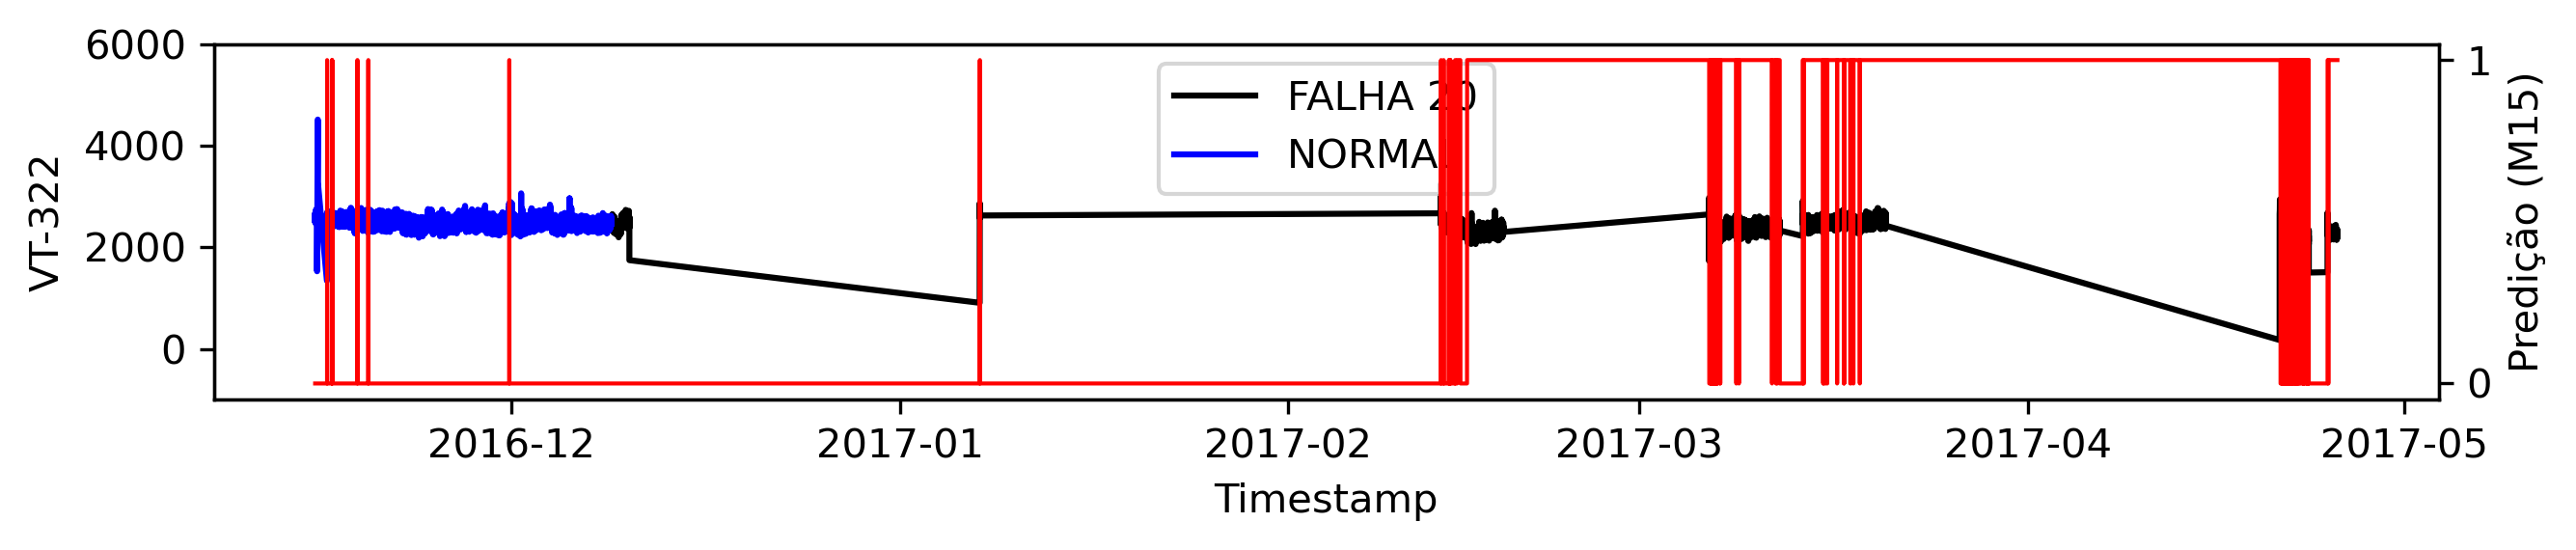

In [253]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FALHA 20')
plot2 = ax1.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')
plot3 = ax2.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)

# 
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VT-322')
ax2.set_ylabel('Predição (M15)') #color='red'
ax1.set_ylim([-1000, 6000])
ax2.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(loc='upper center')
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()

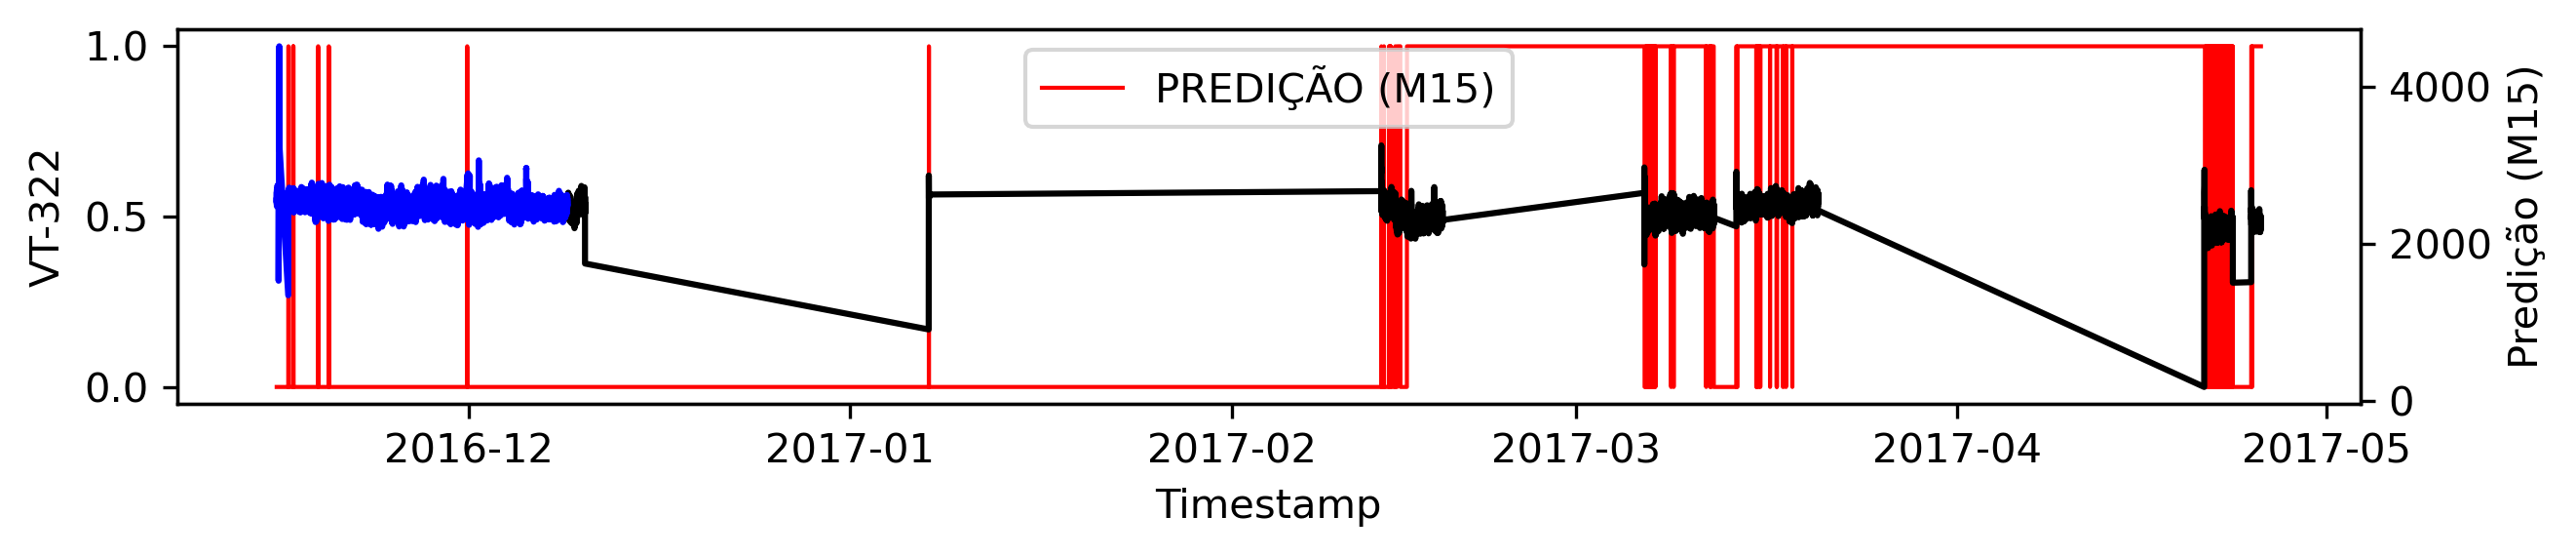

In [254]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)
plot2 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FALHA 20')
plot3 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')

ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VT-322')
ax2.set_ylabel('Predição (M15)') #color='red'
# ax1.set_ylim([-1000, 6000])
# ax2.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(loc='upper center')
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()